
### Imports and plotting setup: import pandas, numpy, matplotlib, seaborn and enable inline plotting. Prepares the environment for data analysis and visualization.

# Introduction

This notebook analyzes the Titanic passenger dataset to build a simple binary classifier that predicts survival. The workflow includes exploratory data analysis (visualizations of survival counts, age/fare distributions, and missingness), data cleaning (dropping high-missing columns, imputing Age by Pclass), basic feature engineering (one-hot encoding Sex and Embarked, dropping identifiers), and training a Logistic Regression model with a train/test split. The objective is to demonstrate an end-to-end pipeline from EDA to a baseline predictive model and to surface insights about factors that influenced survival.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
tit = pd.read_csv(r"C:\Users\user\Desktop\Bootcamp-master\13-Logistic-Regression\titanic_train.csv")

#### Initial inspection: display first rows, info summary, and column names to understand data structure and types.",

In [10]:
display(tit.head())
display(tit.info())
display(tit.columns)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Missing-data visualization: draw a heatmap showing null values to quickly identify missing data patterns.",

<Axes: >

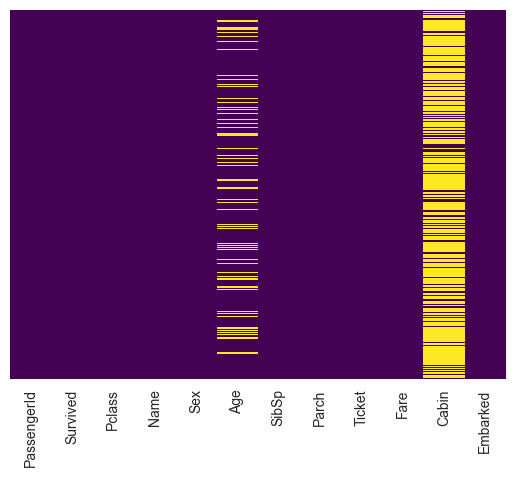

In [11]:
sns.heatmap(tit.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
sns.set_style('whitegrid')

#### Survival counts: plot a countplot of the 'Survived' column to show how many passengers survived vs. died.",

C:\Users\user\AppData\Local\Temp\ipykernel_20688\523926419.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=tit,palette='RdBu_r')


<Axes: xlabel='Survived', ylabel='count'>

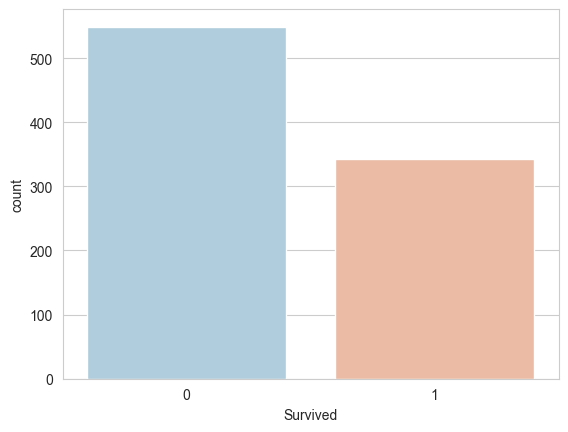

In [18]:
sns.countplot(x='Survived',data=tit,palette='RdBu_r')

#### Survival by gender: countplot of 'Survived' with hue 'Sex' to compare survival rates between males and females."

<Axes: xlabel='Survived', ylabel='count'>

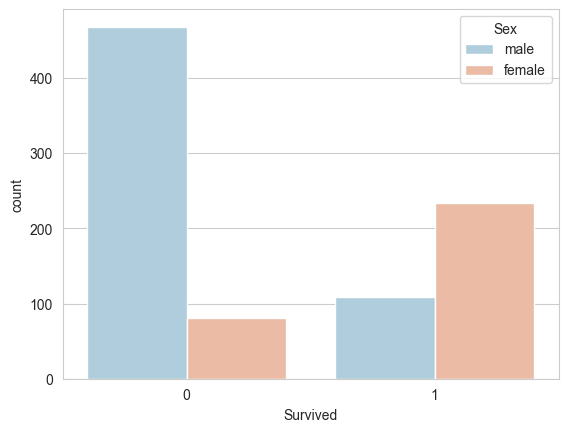

In [17]:
sns.countplot(x='Survived',hue='Sex',data = tit, palette='RdBu_r')

#### Survival by passenger class: countplot of 'Survived' with hue 'Pclass' to compare outcomes across classes

<Axes: xlabel='Survived', ylabel='count'>

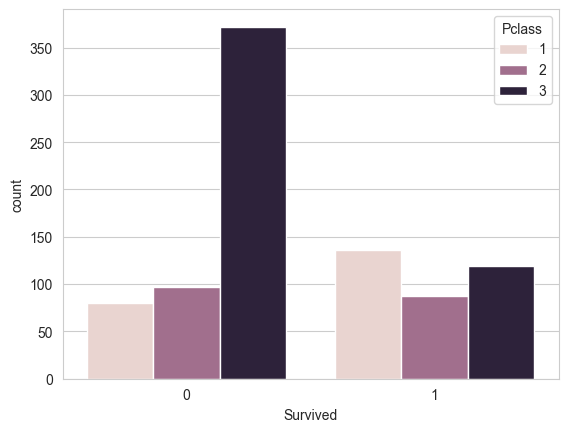

In [20]:
sns.countplot(x='Survived',hue='Pclass',data = tit)

#### Age distribution: histogram (displot) of 'Age' to inspect age distribution and detect skewness or outliers.

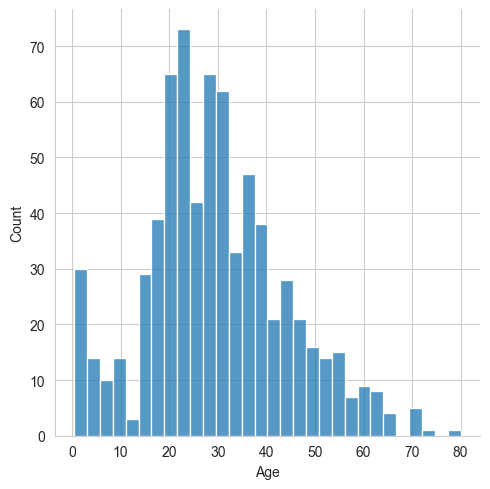

In [22]:
sns.displot(tit['Age'].dropna(),kde=False,bins=30)

#### Age histogram alternative: another histogram of 'Age' using pandas plotting to validate distribution

<Axes: ylabel='Frequency'>

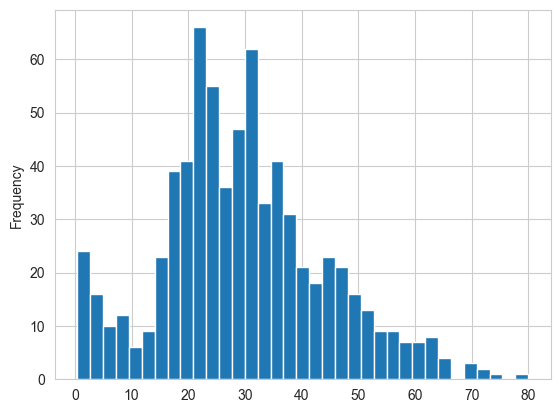

In [23]:
tit['Age'].plot.hist(bins=35)

#### SibSp counts: countplot of 'SibSp' (number of siblings/spouses aboard) to see family-size distribution

C:\Users\user\AppData\Local\Temp\ipykernel_20688\1626563979.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SibSp',data=tit,palette='viridis')


<Axes: xlabel='SibSp', ylabel='count'>

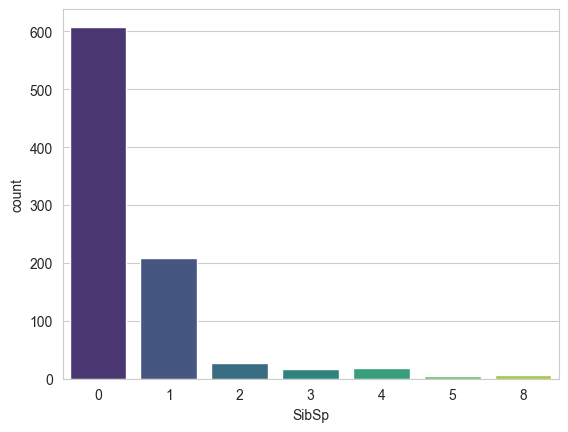

In [25]:
sns.countplot(x='SibSp',data=tit,palette='viridis')

#### Fare distribution: histogram of 'Fare' to inspect price distribution and potential skew/outliers

<Axes: >

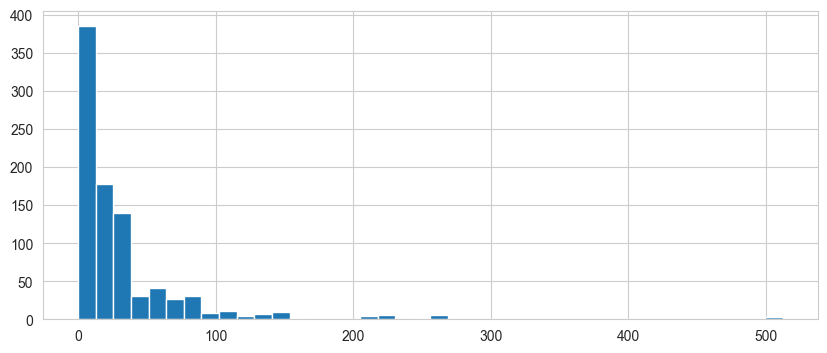

In [27]:
tit['Fare'].hist(bins=40,figsize=(10,4))

In [29]:
pip install cufflinks

Defaulting to user installation because normal site-packages is not writeable
  Using cached cufflinks-0.17.3.tar.gz (81 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached colorlover-0.3.0-py3-none-any.whl.metadata (421 bytes)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
Using cached colorlover-0.3.0-py3-none-any.whl (8.9 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -------------------------------------- - 2.1/2.2 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 11.1 MB/s  0:00:00
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   --------- ------------------------------ 2.4/9.8 MB 11.6 MB

In [43]:
import cufflinks as cf 
cf.go_offline()


In [39]:
    pip install ipyplot

Defaulting to user installation because normal site-packages is not writeable

   -------------------- ------------------- 1/2 [ipyplot]
   ---------------------------------------- 2/2 [ipyplot]

Note: you may need to restart the kernel to use updated packages.


#### Boxplot of Age by Pclass: visualize age distribution per passenger class to help impute missing ages

<Axes: xlabel='Pclass', ylabel='Age'>

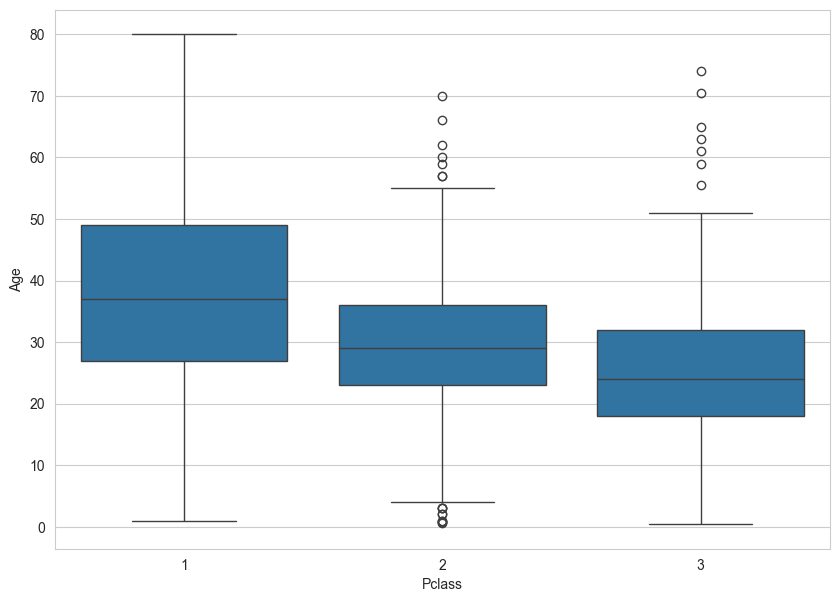

In [49]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data= tit )

#### Define impute_age function: custom function that fills missing Age values based on passenger class medians or chosen values

In [50]:
def impute_age(cols):
  Age=cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):

    if Pclass == 1:
      return 37
    elif Pclass == 2:
      return 29
    else:
      return 24
  else:
    return Age

#### Apply age imputation: use the impute_age function to fill null Age values in the DataFrame

In [51]:
tit['Age'] = tit[['Age','Pclass']].apply(impute_age,axis=1)

C:\Users\user\AppData\Local\Temp\ipykernel_20688\3468272495.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\user\AppData\Local\Temp\ipykernel_20688\3468272495.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



#### Re-check missing values: heatmap after imputation to confirm Age nulls have been handled

<Axes: >

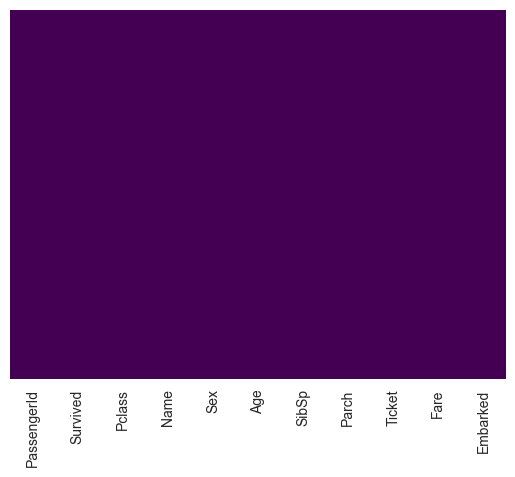

In [56]:
sns.heatmap(tit.isnull(), yticklabels=False,cbar=False,cmap='viridis')

#### Drop Cabin column: remove 'Cabin' column which has many missing values and limited usefulness

In [53]:
tit.drop('Cabin',axis=1,inplace=True)

In [54]:
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [55]:
tit.dropna(inplace=True)

#### Encode Sex: create dummy variable(s) for 'Sex' and store in `sex` (drop_first=True to avoid multicollinearity)

In [57]:
sex = pd.get_dummies(tit['Sex'],drop_first=True)

#### Encode Embarked: create dummy variable(s) for 'Embarked' and store in `embark` (drop_first=True)

In [58]:
embark = pd.get_dummies(tit['Embarked'],drop_first=True)

#### Concatenate dummies: add the new dummy columns for sex and embarked back into the main DataFrame.

In [59]:
tit = pd.concat([tit,sex,embark], axis=1)

In [60]:
tit.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False


#### Drop unused columns: remove original 'Sex', 'Embarked', 'Name', and 'Ticket' since they are no longer needed.

In [61]:
tit.drop(['Sex','Embarked','Name','Ticket'], axis=1,inplace=True)

In [62]:
tit.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


#### Ensure integer types: convert dummy columns to int type and display a quick verification

In [65]:
tit[['male', 'Q', 'S']] = tit[['male', 'Q', 'S']].astype(int)

# quick verification
tit[['male', 'Q', 'S']].head()

,male,Q,S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [64]:
tit.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


#### Drop PassengerId: remove 'PassengerId' as it is an identifier and not a predictive feature

In [67]:
tit.drop('PassengerId',axis=1,inplace=True)

In [68]:
tit.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


### Define features and target: create X (features) by dropping 'Survived' and y (target) as the 'Survived' column

In [73]:
X = tit.drop('Survived',axis=1)
y = tit['Survived']

In [71]:
%pip install scikit-learn
from sklearn.model_selection import train_test_split

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Train-test split: split X and y into training and testing sets (30% test size, random_state=101)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

###  Import model: import LogisticRegression from sklearn for binary classification

In [75]:
from sklearn.linear_model import LogisticRegression

### Instantiate model: create a LogisticRegression object `logmodel` to train on the data

In [76]:
logmodel = LogisticRegression()

### Train model: fit the logistic regression model on X_train and y_train to learn parameters

In [77]:
logmodel.fit(X_train,y_train)

C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning:

lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Predict on test set: use trained `logmodel` to predict labels for X_test and store in `predictions

In [78]:
predictions = logmodel.predict(X_test)

#### Import classification_report: bring in function to compute precision, recall, f1-score and support

In [79]:
from sklearn.metrics import classification_report

#### Print classification report: display detailed per-class performance metrics comparing y_test vs predictions

In [80]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



### Import confusion_matrix: bring in function to compute confusion matrix for classification results

In [81]:
from sklearn.metrics import confusion_matrix

### Show confusion matrix: compute and display confusion matrix to visualize true vs predicted labels

In [82]:
confusion_matrix(y_test,predictions)

array([[147,  16],
       [ 30,  74]])

# Conclusion

Summary of work
- Cleaned and explored the dataset to understand distributions and missingness patterns.
- Imputed missing Age values based on passenger class medians and removed the Cabin column due to extensive missing data.
- Encoded categorical features (Sex, Embarked), removed non-predictive identifiers, and trained a Logistic Regression baseline.
- Evaluated model predictions using a classification report and confusion matrix (see the corresponding cells for detailed metrics).

Key findings and insights
- Sex and passenger class are strong predictors: females and passengers in higher classes had noticeably higher survival rates in EDA and model importance.
- Age and family size showed patterns worth further analysis (e.g., survival tendencies across age groups and SibSp).
- The baseline logistic model provides a reasonable starting point; consult the classification report and confusion matrix for precision/recall trade-offs and class-specific performance.

Limitations
- Simple imputation for Age ignores within-group variance and potential interactions.
- Cabin was dropped entirely; some useful signal may have been lost.
- Only a single baseline model (Logistic Regression) was trained without hyperparameter tuning or cross-validation.
- No feature scaling/regularization analysis or model explainability (SHAP/coefficients) beyond basic inspection.

Recommendations / Next steps
- Perform cross-validated model selection and hyperparameter tuning; try tree-based models (Random Forest, XGBoost) and ensemble methods.
- Improve imputation (KNN or model-based) and consider engineered features (family size, title extraction from names).
- Evaluate model robustness with cross-validation, stratified splits, and calibration plots.
- Use explainability tools (SHAP, partial dependence) to quantify feature contributions and validate domain insights.
- Package preprocessing and modeling steps into a pipeline for reproducibility and deployment.

Overall, this project establishes a clear baseline and identifies several actionable directions to improve predictive performance and interpretability.